In [1]:
import os
import geopandas as gp
from matplotlib import pyplot as plt

In [2]:
la_boundaries = gp.read_file('../data/local_authority_boundaries.geojson')
la_boundaries.head(2)

,OBJECTID,lau115cd,lau115nm,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E06000001,Hartlepool,9.361241e+07,69647.682988,65257709-fe12-4add-b4c2-109270543788,"MULTIPOLYGON (((-1.27025 54.72717, -1.26822 54..."
1,2,E06000002,Middlesbrough,5.387900e+07,42085.659352,76045315-1028-47f0-9a9a-8c83b7cebf82,"MULTIPOLYGON (((-1.23003 54.58411, -1.23016 54..."


<Axes: >

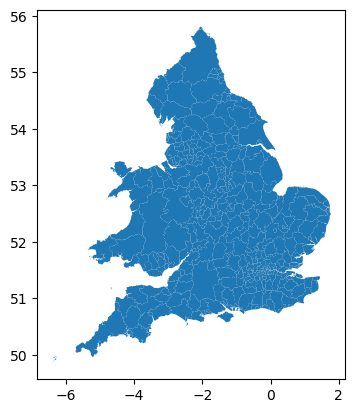

In [3]:
la_boundaries.plot()

In [4]:
crow = gp.read_file('../data/defra_crow_oa.geojson')
crow.head(2)

,OBJECTID,Descrip,OC,RCL,S16,Map_Area,Version,Shape_Leng,geometry
0,1,"Access Land - Combined Open Country, Registere...",Yes,No,No,1,20,656.088036,"POLYGON ((0.00194 51.07273, 0.00194 51.07272, ..."
1,2,"Access Land - Combined Open Country, Registere...",Yes,No,No,1,20,245.288413,"POLYGON ((0.06944 51.04041, 0.06969 51.04037, ..."


<Axes: >

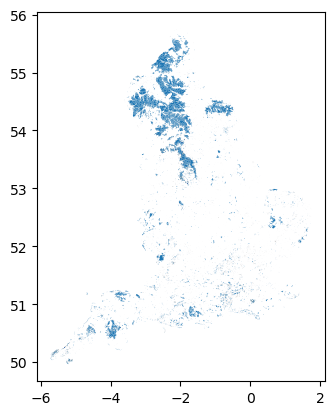

In [5]:
crow.plot()

In [6]:
intersection = gp.overlay(
    la_boundaries,
    crow,
    how="intersection"
)

In [7]:
intersection.head()

,OBJECTID_1,lau115cd,lau115nm,Shape__Area,Shape__Length,GlobalID,OBJECTID_2,Descrip,OC,RCL,S16,Map_Area,Version,Shape_Leng,geometry
0,2,E06000002,Middlesbrough,5.387900e+07,42085.659352,76045315-1028-47f0-9a9a-8c83b7cebf82,32722,"Access Land - Combined Open Country, Registere...",No,Yes,No,5,20,300.529276,"POLYGON ((-1.18684 54.51813, -1.18679 54.51815..."
1,3,E06000003,Redcar and Cleveland,2.448312e+08,95994.195680,be65f7de-98ae-44f2-9faa-f549eef06b47,18183,"Access Land - Combined Open Country, Registere...",Yes,No,No,5,20,7686.924192,"MULTIPOLYGON (((-1.06002 54.50033, -1.06068 54..."
2,3,E06000003,Redcar and Cleveland,2.448312e+08,95994.195680,be65f7de-98ae-44f2-9faa-f549eef06b47,18241,"Access Land - Combined Open Country, Registere...",Yes,No,No,5,20,42178.794620,"MULTIPOLYGON (((-0.95338 54.48819, -0.95444 54..."
3,3,E06000003,Redcar and Cleveland,2.448312e+08,95994.195680,be65f7de-98ae-44f2-9faa-f549eef06b47,18448,"Access Land - Combined Open Country, Registere...",Yes,No,No,5,20,1292.844829,"POLYGON ((-0.85943 54.49884, -0.85953 54.49836..."
4,3,E06000003,Redcar and Cleveland,2.448312e+08,95994.195680,be65f7de-98ae-44f2-9faa-f549eef06b47,18464,"Access Land - Combined Open Country, Registere...",Yes,No,No,5,20,778.868389,"POLYGON ((-0.85170 54.50025, -0.85171 54.50025..."


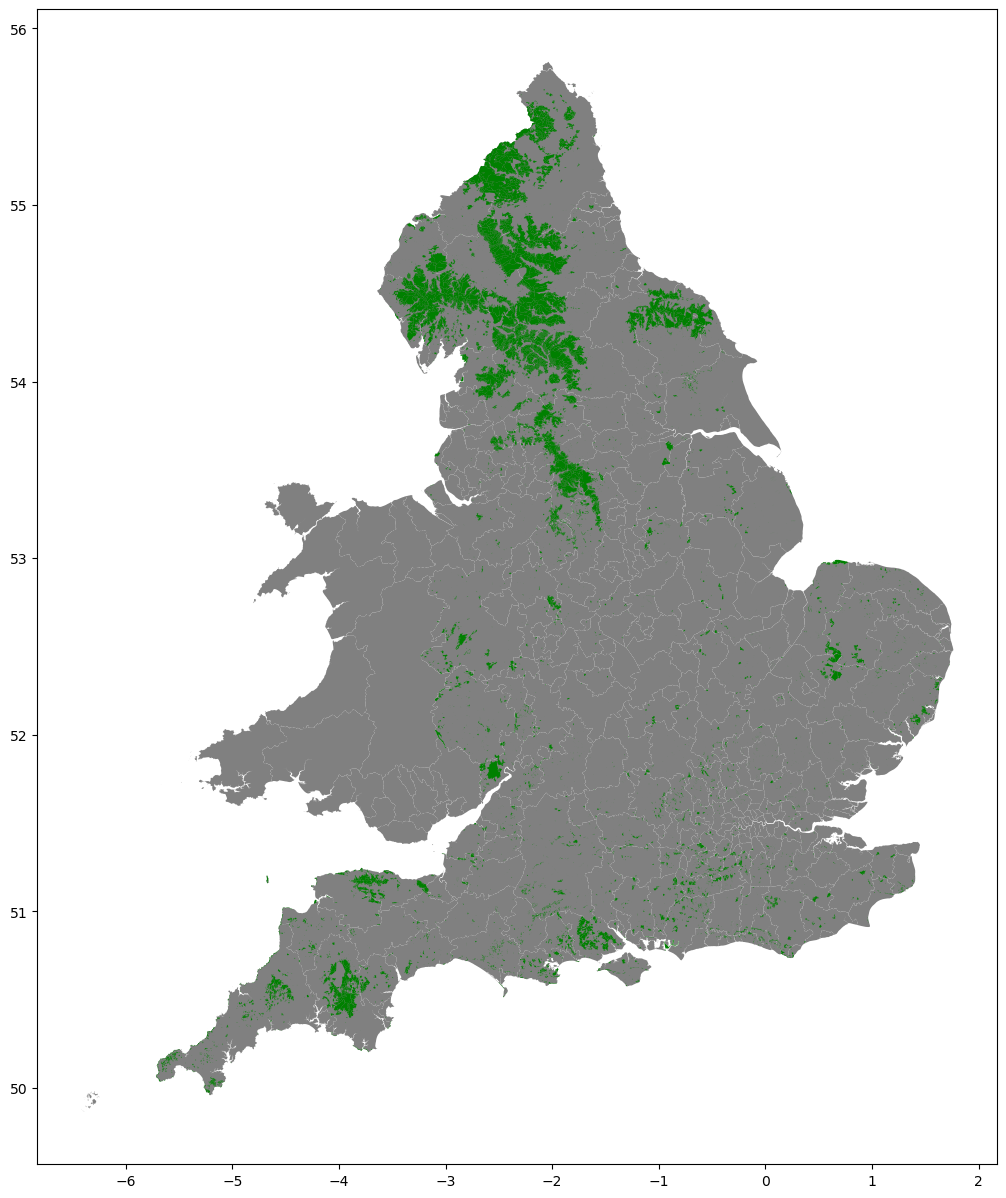

In [14]:
f, ax = plt.subplots()
la_boundaries.plot(ax=ax, color='grey')
crow.plot(ax=ax, color='green')
f.set_figheight(15)
f.set_figwidth(15)

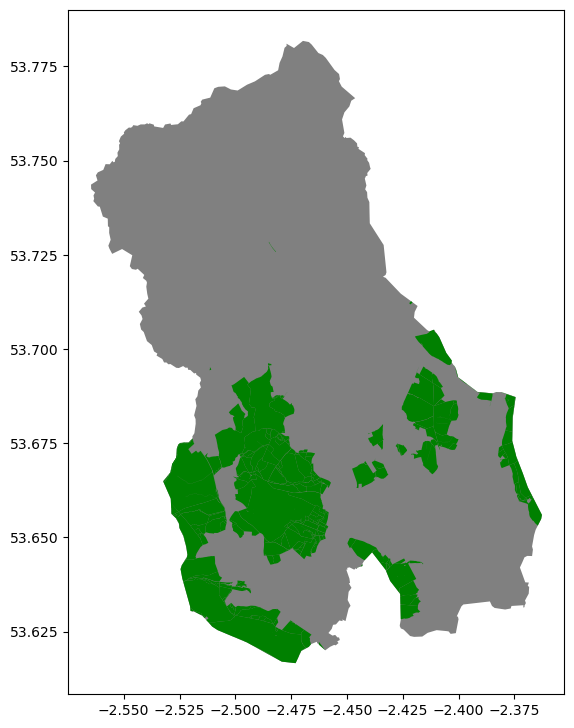

In [9]:
f, ax = plt.subplots()
la_boundaries.loc[la_boundaries['lau115nm'] == 'Blackburn with Darwen'].plot(ax=ax, color='grey')
intersection.loc[intersection['lau115nm'] == 'Blackburn with Darwen'].plot(ax=ax, color='green')
f.set_figheight(15)

In [10]:
intersection['oa_area'] = (intersection['Shape__Area_2'] / intersection['Shape__Area_1']) * 100

KeyError: 'Shape__Area_2'

In [12]:
intersection[['OBJECTID_1', 'oa_area']].groupby('OBJECTID_1').sum()

,oa_area
OBJECTID_1,
6,0.078415
8,8.998797
35,0.330987
36,0.840993
40,0.000010
...,...
301,1.408983
310,0.115616
314,0.270248
